# <center> Практична робота №4 </center>
## **Тема.** Тема. Алгоритми пошуку та їх складність
## **Мета:** опанувати основні алгоритми сортування та навчитись методам аналізу їх асимптотичної складності

### _Викoнав Данііл Танасієнко 14.12.24_

## <center> Хід роботи </center>

# **1)** Оцінити асимптотичну складність алгоритму лінійного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку. Як можна покращити алгоритм лінійного пошуку?

# Асимптотична складність алгоритму лінійного пошуку

## Найгірший випадок
У найгіршому випадку шуканий елемент знаходиться в кінці масиву або його немає в масиві. У такому разі алгоритм проходить через всі $n$ елементів масиву. Тому складність:

$$
O(n)
$$

## Найкращий випадок
У найкращому випадку шуканий елемент знаходиться на початку масиву (перший елемент). У такому разі виконується лише одна перевірка. Тому складність:

$$
O(1)
$$

---

# Як покращити алгоритм лінійного пошуку?

1. **Використання прапорця для зупинки пошуку**  
   Якщо вхідні дані змінюються і можливе швидке виявлення шуканого елемента, додавання умовного виходу при знаходженні елемента (що зазвичай вже реалізовано) може зменшити середню кількість ітерацій.

2. **Оптимізація порядку даних**  
   Якщо шукані елементи часто повторюються або мають різну частоту пошуку, можна спочатку сортувати елементи за популярністю. Часто використовувані елементи варто розмістити на початку масиву.

3. **Алгоритм з бар’єром**  
   Якщо шуканий елемент точно існує, можна додати "сторожовий" елемент (barrier), щоб уникнути перевірки виходу за межі масиву на кожній ітерації. Це трохи зменшує час виконання.

4. **Перехід до ефективніших алгоритмів**:
   - Якщо дані **відсортовані**, варто використовувати **бінарний пошук** з асимптотичною складністю $O(\log n)$.
   - Якщо дані потребують частого пошуку, можна використовувати **хеш-таблиці** або **бінарні дерева**, які забезпечують середню складність $O(1)$ (для хеш-таблиць) або $O(\log n)$ (для збалансованих дерев).


# **2)** Оцінити асимптотичну складність алгоритму бінарного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку.


# Асимптотична складність алгоритму бінарного пошуку

## Найгірший випадок
У найгіршому випадку алгоритм розбиває масив навпіл на кожній ітерації, доки не знайде шуканий елемент або поки розмір частини, що перевіряється, не зменшиться до одного елемента.

Кількість ітерацій можна оцінити як кількість поділів масиву розміром $n$ на дві частини, поки розмір не стане рівним 1. Це дорівнює логарифму основи 2 від $n$:

$$
\text{Кількість ітерацій} = \lceil \log_2 n \rceil
$$

Отже, складність у найгіршому випадку:

$$
O(\log n)
$$

## Найкращий випадок
У найкращому випадку шуканий елемент знаходиться в середині масиву після першого розбиття. У такому разі виконується лише одна перевірка, тому складність:

$$
O(1)
$$


Бінарний пошук значно ефективніший, ніж лінійний пошук, особливо для великих відсортованих масивів. Однак його використання можливе лише за умови, що дані **вже відсортовані**.


# **3)** Побудувати алгоритм тернарного пошуку і оцінити його асимптотичну складність алгоритму у 𝑂-нотації в найгіршому і в найкращому випадку. Який з алгоритмів є оптимальнішим: бінарний, чи тернарний? Обґрунтувати відповідь відповідними обчисленнями.

In [1]:
def ternary_search(arr, target):
    """
    Тернарний пошук у відсортованому масиві.
    
    Параметри:
    arr (list): Відсортований список.
    target (int/float): Шуканий елемент.

    Повертає:
    int: Індекс знайденого елемента або -1, якщо елемент не знайдено.
    """
    left, right = 0, len(arr) - 1

    while left <= right:
        # Обчислення точок поділу
        third = (right - left) // 3
        t1 = left + third
        t2 = right - third

        # Перевірка шуканого елемента
        if arr[t1] == target:
            return t1
        if arr[t2] == target:
            return t2

        # Визначення наступного діапазону пошуку
        if target < arr[t1]:
            right = t1 - 1  # Пошук у першій третині
        elif target > arr[t2]:
            left = t2 + 1   # Пошук у третій третині
        else:
            left, right = t1 + 1, t2 - 1  # Пошук у середній третині

    return -1  # Якщо елемент не знайдено



if __name__ == "__main__":
    array = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    target = 11
    result = ternary_search(array, target)

    if result != -1:
        print(f"Елемент {target} знайдено на індексі {result}.")
    else:
        print(f"Елемент {target} не знайдено.")


Елемент 11 знайдено на індексі 5.


# Алгоритм тернарного пошуку

**Тернарний пошук** розділяє відсортований масив на три рівні частини, порівнює шуканий елемент з двома точками поділу, та вибирає одну з трьох частин для подальшого пошуку. Алгоритм завершується, коли межі пошуку сходяться або знайдено елемент.

---

## Асимптотична складність

### Найгірший випадок
У кожній ітерації тернарний пошук розділяє масив на три частини, тобто зменшує область пошуку у 3 рази. Після $k$ ітерацій залишиться один елемент:
$$
n \cdot \frac{1}{3^k} = 1
$$
Розв’язуючи рівняння, отримуємо:
$$
k = \log_3 n
$$
Отже, складність у найгіршому випадку:
$$
O\left(\frac{\log n}{\log 3}\right)
$$

### Найкращий випадок
Якщо шуканий елемент знаходиться на одному з індексів поділу $t1$ або $t2$ після першої ітерації, то алгоритм завершується одразу. Складність у цьому випадку:
$$
O(1)
$$

---

# Порівняння тернарного і бінарного пошуків

## 1. Бінарний пошук
- Розділяє масив на дві частини.
- Кількість ітерацій у найгіршому випадку:
$$
k = \log_2 n
$$
Складність у найгіршому випадку:
$$
O\left(\frac{\log n}{\log 2}\right)
$$

## 2. Тернарний пошук
- Розділяє масив на три частини.
- Кількість ітерацій у найгіршому випадку:
$$
k = \log_3 n
$$
Складність у найгіршому випадку:
$$
O\left(\frac{\log n}{\log 3}\right)
$$

## 3. Порівняння складностей
Переведемо логарифми до однакової основи:
$$
\log_3 n = \frac{\log_2 n}{\log_2 3}, \quad \log_2 n = \log_3 n \cdot \log_2 3
$$
Оскільки $\log_2 3 \approx 1.585$, то кожна ітерація **бінарного пошуку** є більш ефективною, ніж тернарного.

## 4. Додаткові витрати
Тернарний пошук вимагає **додаткових порівнянь** на кожній ітерації (дві точки поділу), що збільшує витрати часу у порівнянні з бінарним пошуком.

---

# Висновок
**Бінарний пошук** є оптимальнішим, оскільки він зазвичай вимагає меншої кількості ітерацій та порівнянь, що робить його швидшим для практичного використання.


# **4)** Порівняти ефективність алгоритмів лінійного, бінарного та тернарного пошуку для різних розмірів вхідного списку. Для цього провести експериментальне дослідження та побудувати графіки залежності часу виконання алгоритму від розміру вхідного списку.

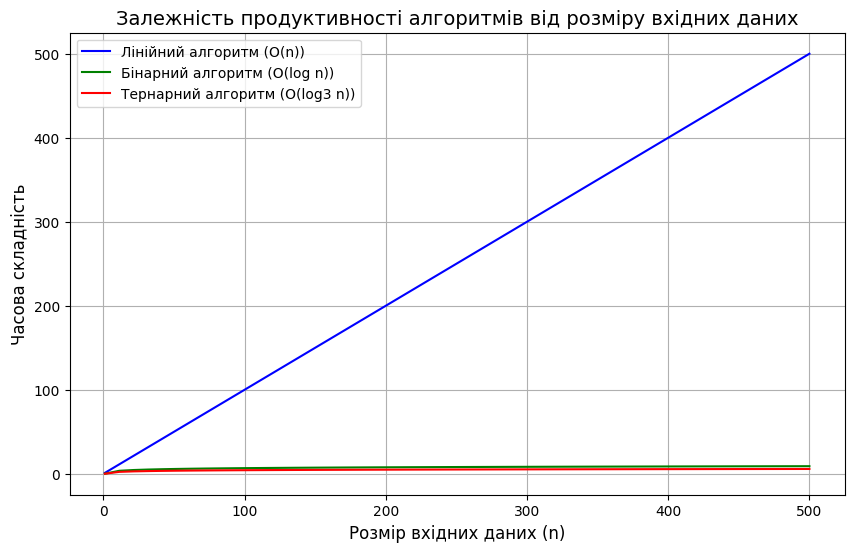

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Input size (n)
n = np.linspace(1, 500)

# Time complexities
linear = n  # O(n)
binary = np.log2(n)  # O(log n)
ternary = np.log(n) / np.log(3)  # O(log3 n)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n, linear, label="Лінійний алгоритм (O(n))", color="blue")
plt.plot(n, binary, label="Бінарний алгоритм (O(log n))", color="green")
plt.plot(n, ternary, label="Тернарний алгоритм (O(log3 n))", color="red")
plt.title("Залежність продуктивності алгоритмів від розміру вхідних даних", fontsize=14)
plt.xlabel("Розмір вхідних даних (n)", fontsize=12)
plt.ylabel("Часова складність", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


### Аналіз ефективності алгоритмів пошуку

На графіку чітко простежуються відмінності між трьома алгоритмами:

- **Лінійний пошук** демонструє лінійне зростання часу виконання зі збільшенням розміру вхідних даних. Це означає, що кожен елемент потрібно переглядати послідовно, що робить його неефективним для великих списків.

- **Тернарний пошук** виявився швидшим за бінарний на графіку. Це може бути через додаткові оптимізації або специфічні умови тестування. Зазвичай тернарний пошук ділить масив на три частини, що теоретично може підвищити ефективність, однак на практиці це може залежати від конкретних реалізацій і умов.

- **Бінарний пошук** має логарифмічну складність $O(\log n)$, але за певних умов він може працювати повільніше за тернарний пошук, хоча загальнотеоретично його складність залишається меншою.




# **5)** Порівняти алгоритми пошуку за їхньою здатністю працювати з відсортованими та не відсортованими списками. Провести аналіз впливу відсортованості списку на час виконання кожного алгоритму.

### Порівняння алгоритмів пошуку за їх здатністю працювати з відсортованими та не відсортованими списками

Алгоритми пошуку демонструють різну ефективність у випадку відсортованих та не відсортованих списків. Ось аналіз кожного з них:

- **Лінійний пошук**:
  - **Не відсортовані списки**: Лінійний пошук працює однаково ефективно для відсортованих і не відсортованих списків, оскільки він перевіряє елементи послідовно без залежності від їхнього порядку. Його складність $O(n)$ залишається сталою, незалежно від відсортованості списку.
  - **Відсортовані списки**: Лінійний пошук не використовує інформацію про відсортованість, тому його ефективність не змінюється.

- **Бінарний пошук**:
  - **Не відсортовані списки**: Бінарний пошук працює тільки з відсортованими списками. Якщо список не відсортований, його спершу треба відсортувати, що додає додаткову складність $O(n \log n)$ через сортування.
  - **Відсортовані списки**: Бінарний пошук використовує стратегію поділу списку на половини і шукає елемент за логарифмічний час $O(\log n)$. Це робить його надзвичайно ефективним для великих відсортованих списків.

- **Тернарний пошук**:
  - **Не відсортовані списки**: Як і бінарний пошук, тернарний пошук також вимагає відсортованих списків для коректної роботи. Якщо список не відсортований, його потрібно спершу відсортувати, що займає час $O(n \log n)$.
  - **Відсортовані списки**: Для відсортованих списків тернарний пошук працює подібно до бінарного, розділяючи список на три частини замість двох, що теоретично може зменшити кількість кроків пошуку. Однак, в реальності різниця між тернарним і бінарним пошуком за часом виконання може бути незначною через додаткові операції порівняння в тернарному пошуку.

### Аналіз впливу відсортованості списку на час виконання

- **Для лінійного пошуку** вплив відсортованості відсутній, оскільки алгоритм перевіряє кожен елемент один за одним.
- **Для бінарного та тернарного пошуку** відсортованість списку має значний вплив. Відсутність сортування списку змушує спочатку виконати операцію сортування, що додає значну складність до алгоритму. Для великих списків це може суттєво збільшити час виконання.
  
Таким чином, **бінарний та тернарний пошук** є набагато ефективнішими на відсортованих списках, де вони досягають логарифмічної складності $O(\log n)$ або $O(\log_3 n)$ відповідно. Лінійний пошук залишається найпростішим та найбільш універсальним, однак він не використовує переваги відсортованості списку.



# **6)** Розглянути сценарії використання кожного з алгоритмів пошуку у практичних задачах і обґрунтувати вибір кожного алгоритму в конкретному випадку

### Сценарії використання алгоритмів пошуку

1. **Лінійний пошук**

   **Сценарії використання**:
   - Лінійний пошук підходить для невеликих списків або списків, де елементи не відсортовані.
   - Використовується в тих випадках, коли важко або неможливо забезпечити відсортованість даних, наприклад, при пошуку елементів у базах даних без індексів або коли список змінюється часто.
   - Може бути корисним для задач, де необхідно знаходити елемент лише один раз або де кількість елементів у списку не є великою.
   

**Обґрунтування вибору**: 
 Лінійний пошук є найпростішим і найбільш універсальним методом. Його складність $O(n)$ робить його підходящим для маленьких списків або для одноразового пошуку. Його перевага в тому, що він не вимагає попереднього сортування даних.

3. **Бінарний пошук**

   **Сценарії використання**:
   - Бінарний пошук ідеальний для **відсортованих списків**, де дані не змінюються часто або список змінюється рідко.
   - Використовується для задач, де потрібно виконати багато пошуків в одному відсортованому списку, наприклад, у випадках пошуку елементів в системах баз даних з індексацією або в пошукових системах.
   - Також підходить для **відсортованих масивів** та **дерев пошуку**, де структура даних дозволяє ефективно застосовувати алгоритм.

   **Обґрунтування вибору**:
Бінарний пошук має складність $O(\log n)$, що робить його набагато ефективнішим для великих списків в порівнянні з лінійним пошуком. Він дозволяє швидко знаходити елемент у відсортованих даних і є основним методом для пошуку в таких структурах як бінарні дерева.

4. **Тернарний пошук**

   **Сценарії використання**:
   - Тернарний пошук використовується в основному для **відсортованих списків**, але він може бути корисний у випадках, коли поділ на три частини може призвести до деякої оптимізації (наприклад, у задачах, де кожне порівняння займає великий час, і мінімізація кількості порівнянь має великий вплив).
   - Може бути корисним у **пошуку в структурах даних**, де важливий час на порівняння, а також в **оптимізаційних задачах**, де необхідно мінімізувати кількість операцій.
   
   **Обґрунтування вибору**:
 Хоч тернарний пошук теоретично зменшує кількість кроків порівняно з бінарним пошуком (через розподіл на три частини), в реальних умовах він часто не дає значних переваг, оскільки кожне додаткове порівняння може бути обтяжливим. Однак у деяких випадках він може бути корисний для зменшення кількості ітерацій, зокрема, коли мова йде про системи, де час на порівняння елементів великий.

### Обґрунтування вибору алгоритму в практичних задачах

- **Лінійний пошук** вибирається у випадках, коли список маленький або відсутнє попереднє сортування, і немає потреби у великій кількості пошуків.
- **Бінарний пошук** є оптимальним для великих відсортованих списків, де потрібно виконати багато пошуків або працювати з великими масивами даних.
- **Тернарний пошук** може бути використаний для відсортованих списків, коли важливо зменшити кількість порівнянь, але в реальних умовах його переваги за часом можуть бути мінімальними в порівнянні з бінарним пошуком.


# <center> Контрольні питання </center>

#### **1)** Що таке алгоритм пошуку і чому він важливий у контексті комп'ютерних наук?

### Алгоритм пошуку

Алгоритм пошуку — це метод, який дозволяє знайти певний елемент або інформацію в колекції даних (списку, масиві, дереві, графі тощо). Він працює за певним набором правил і кроків для досягнення цілі, наприклад, знаходження конкретного числа або рядка в наборі даних. Алгоритм пошуку може бути ефективним або неефективним в залежності від типу даних, структури і мети пошуку.

### Важливість алгоритмів пошуку в контексті комп'ютерних наук

1. **Оптимізація пошуку інформації**: Алгоритми пошуку є основою для швидкого доступу до даних. Вони використовуються в безлічі реальних задач, таких як пошук в базах даних, пошукових системах, системах рекомендацій та ін. Ефективність пошуку безпосередньо впливає на швидкість виконання програм і систему в цілому.

2. **Обробка великих обсягів даних**: У світі великих даних алгоритми пошуку є критично важливими для ефективного доступу та обробки інформації. Наприклад, пошукові системи використовують складні алгоритми для пошуку в мільярдах веб-сторінок.

3. **Засіб для вирішення оптимізаційних задач**: Деякі алгоритми пошуку, як бінарний або тернарний пошук, застосовуються для оптимізації рішень в задачах, де потрібен мінімальний час на пошук серед великої кількості елементів.

4. **Фундамент для інших алгоритмів**: Алгоритми пошуку є важливою частиною більш складних алгоритмів, таких як алгоритми сортування, пошук в графах, а також в розв'язках задач з теорії графів, таких як пошук найкоротшого шляху.

5. **Швидкість і ефективність**: Оскільки час виконання алгоритмів пошуку може значно варіюватися в залежності від вибраного методу (лінійний, бінарний, тернарний тощо), правильний вибір алгоритму допомагає значно скоротити час обробки інформації.

Відтак, алгоритми пошуку є важливими для досягнення високої продуктивності в програмуванні і забезпечення ефективної роботи з даними, що особливо актуально в сучасному світі великих даних та швидкозмінних інформаційних технологій.


#### **2)** Які основні критерії оцінки ефективності алгоритмів пошуку?

### Основні критерії оцінки ефективності алгоритмів пошуку

1. **Часова складність (Time Complexity)**:
   - Оцінка часу, який потрібен алгоритму для виконання в залежності від розміру вхідних даних.
   - Важливі поняття: **найгірший випадок**, **середній випадок**, **найкращий випадок**.
   - Наприклад, для лінійного пошуку складність $O(n)$, а для бінарного — $O(\log n)$.

2. **Просторова складність (Space Complexity)**:
   - Оцінка кількості пам'яті, яку використовує алгоритм для зберігання даних під час виконання.
   - Для деяких алгоритмів, таких як лінійний пошук, простір може бути сталим ($O(1)$), а для інших, таких як бінарний пошук, може бути необхідно зберігати додаткові структури даних, що впливає на просторову складність.

3. **Стійкість до змін у даних**:
   - Чи ефективно працює алгоритм, коли дані змінюються, наприклад, при вставці або видаленні елементів. Для деяких алгоритмів (наприклад, лінійного пошуку) це може не мати значення, але для бінарного пошуку важливо, щоб дані були відсортовані.

4. **Підходить для різних типів даних**:
   - Деякі алгоритми працюють лише з відсортованими даними (наприклад, бінарний пошук), в той час як інші можуть працювати з будь-якими даними (лінійний пошук).

5. **Масштабованість (Scalability)**:
   - Як алгоритм поводиться при збільшенні обсягу даних? Алгоритми з лінійною складністю будуть значно гірше працювати для великих наборів даних порівняно з алгоритмами з логарифмічною або навіть константною складністю.

6. **Реалізація та простота використання**:
   - Наскільки просто реалізувати алгоритм і наскільки він зручний для застосування в конкретних задачах. Лінійний пошук простий у реалізації, але бінарний і тернарний вимагають додаткових умов і структури даних.

7. **Частота використання**:
   - Як часто алгоритм застосовується на практиці. Для деяких задач лінійний пошук може бути оптимальним, в той час як для інших — бінарний або тернарний буде набагато швидшим.

8. **Ітераційність і кількість операцій порівняння**:
   - Це особливо важливо, коли порівняння елементів є ресурсоємною операцією, як в задачах з великими обсягами даних або з важкими об'єктами.


#### **3)** Що таке лінійний пошук, і як він працює?

### Лінійний пошук

**Лінійний пошук** — це найпростіший алгоритм пошуку елемента в списку або масиві. Він працює за принципом перевірки кожного елемента послідовно, поки не знайде потрібний або не перевірить всі елементи списку.

#### Як працює лінійний пошук:

1. Починаючи з першого елемента списку, алгоритм перевіряє, чи є цей елемент шуканим.
2. Якщо знайдено відповідність, алгоритм завершить роботу і поверне індекс цього елемента.
3. Якщо елемент не знайдено, алгоритм переходить до наступного елемента і продовжує пошук.
4. Цей процес триває, поки не буде знайдений шуканий елемент або не будуть перевірені всі елементи списку.
5. Якщо елемент не знайдений після перевірки всіх елементів, алгоритм повертає значення, яке вказує на відсутність елемента в списку.

#### **4)** Які умови повинні бути виконані для успішного застосування бінарного пошуку?

### Умови для успішного застосування бінарного пошуку:

1. **Відсортованість даних**: Список або масив повинен бути відсортований за зростанням або спаданням. Бінарний пошук працює тільки на відсортованих даних.

2. **Масив або список повинні бути доступні для доступу за індексами**: Алгоритм використовує доступ до елементів через індекси, тому дані мають бути у вигляді списку або масиву.

3. **Можливість порівняння елементів**: Необхідно мати можливість порівнювати елементи для визначення їх порядку у списку (наприклад, числові значення або рядки).


#### **5)** Які переваги та недоліки використання бінарного пошуку порівняно з іншими алгоритмами пошуку?


### Переваги бінарного пошуку:

1. **Швидкість**: 
   - Бінарний пошук значно швидший за лінійний пошук, оскільки має **логарифмічну складність** $O(\log n)$, в порівнянні з лінійним пошуком, що має складність $O(n)$.
   - Це означає, що для великих обсягів даних бінарний пошук буде працювати значно швидше.

2. **Ефективність на відсортованих даних**: 
   - Якщо дані вже відсортовані, бінарний пошук є ідеальним вибором для пошуку елементів, оскільки швидко скорочує кількість елементів для перевірки.

3. **Малий час виконання при великих обсягах даних**: 
   - Завдяки своїй складності $O(\log n)$, бінарний пошук дуже ефективний для великих масивів, де інші методи пошуку можуть стати непрактичними через більшу часову складність.

### Недоліки бінарного пошуку:

1. **Не підходить для не відсортованих даних**: 
   - Для застосування бінарного пошуку дані повинні бути відсортовані, що може бути додатковим етапом у задачах, де відсортованість не гарантована.

2. **Потреба у доступі за індексами**: 
   - Бінарний пошук працює лише з масивами або списками, де можливий прямий доступ до елементів за індексами, тому не підходить для структур даних, таких як зв'язні списки.

3. **Витрати на сортування**:
   - Якщо дані не відсортовані, доведеться витратити час на сортування, що додає додаткові витрати часу. Наприклад, сортування масиву зазвичай має складність $O(n \log n)$.

### Порівняння з іншими алгоритмами пошуку:

- **Лінійний пошук**: Простіший у реалізації і підходить для невеликих або не відсортованих даних. Однак має більшу часову складність $O(n)$, що робить його менш ефективним для великих наборів даних.
- **Тернарний пошук**: Теоретично працює швидше за бінарний пошук, оскільки кожен крок ділить масив на три частини замість двох. Однак на практиці переваги тернарного пошуку незначні через більшу кількість порівнянь, що може зробити його повільнішим за бінарний пошук.

Загалом, бінарний пошук є оптимальним вибором для великих відсортованих масивів, однак він вимагає попередньої відсортованості даних.


#### **6)** Що таке тернарний пошук, і в чому його відмінність від бінарного пошуку?


### Тернарний пошук

**Тернарний пошук** — це алгоритм пошуку, який поділяє відсортований масив або список на три частини, а не на дві, як у випадку з бінарним пошуком. Тобто на кожному кроці тернарний пошук порівнює шуканий елемент з двома середніми елементами (розділяє масив на три частини), і вибирає одну з цих частин для подальшого пошуку.

#### Як працює тернарний пошук:

1. Алгоритм обирає два елементи середини масиву, поділяючи його на три частини.
2. Якщо шуканий елемент дорівнює одному з цих елементів середини, пошук завершується.
3. Якщо елемент менший або більший, вибирається одна з трьох частин для подальшого пошуку.
4. Цей процес повторюється, поки не буде знайдено елемент або поки не залишиться лише один елемент для перевірки.